# Task 2

---

## Predictive modeling of customer bookings


First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [47]:
import pandas as pd

In [48]:
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [50]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [51]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [52]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [53]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

Now we have select Algorithm to predict bookings in future. https://scikit-learn.org/stable/modules/ensemble.html#random-forests-and-other-randomized-tree-ensembles

In [54]:
print(df.columns)  # Check available columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')


In [55]:
df.head(5)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [56]:
# !pip install seaborn


In [57]:
# df.groupby(by="booking_origin")


In [58]:
# dfpassenger_counts = df.groupby('booking_origin')['num_passengers'].sum().reset_index()

In [59]:
# dfpassenger_counts

   num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0               2      Internet  RoundTrip            262              19   
1               1      Internet  RoundTrip            112              20   
2               2      Internet  RoundTrip            243              22   
3               1      Internet  RoundTrip             96              31   
4               2      Internet  RoundTrip             68              22   

   flight_hour  flight_day   route booking_origin  wants_extra_baggage  \
0            7           6  AKLDEL    New Zealand                    1   
1            3           6  AKLDEL    New Zealand                    0   
2           17           3  AKLDEL          India                    1   
3            4           6  AKLDEL    New Zealand                    0   
4           15           3  AKLDEL          India                    1   

   wants_preferred_seat  wants_in_flight_meals  flight_duration  \
0                     0  

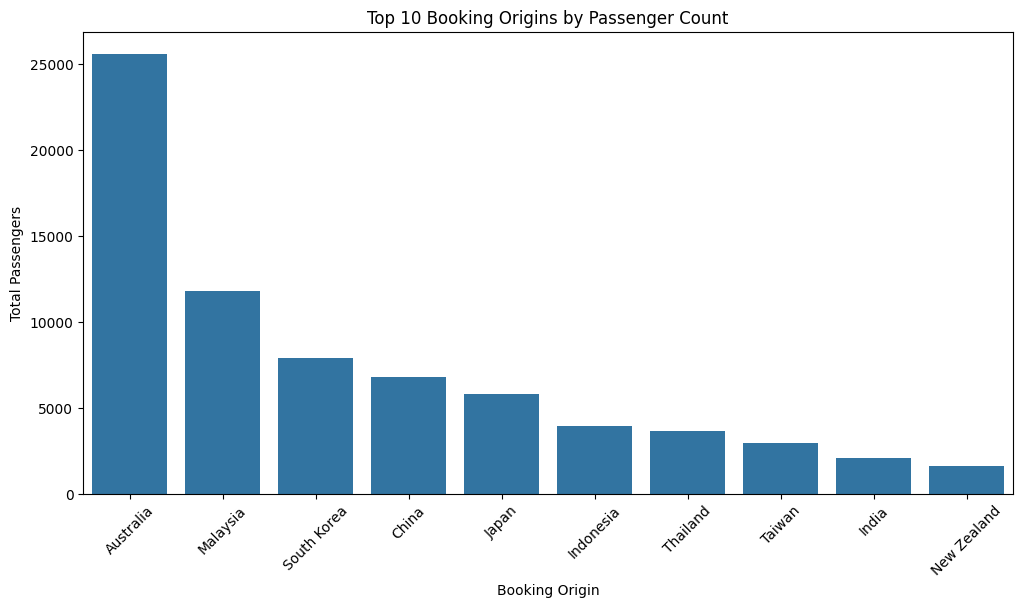

      route  num_passengers
6    AKLKUL            4350
717  PENTPE            1550
287  DMKKIX            1397
436  ICNSIN            1325
633  MELSGN            1214
300  DPSICN            1184
438  ICNSYD             979
626  MELPEN             926
178  COKSYD             925
291  DMKOOL             907
Booking Completion Rate:
 booking_complete
0    85.002334
1    14.997666
Name: proportion, dtype: float64


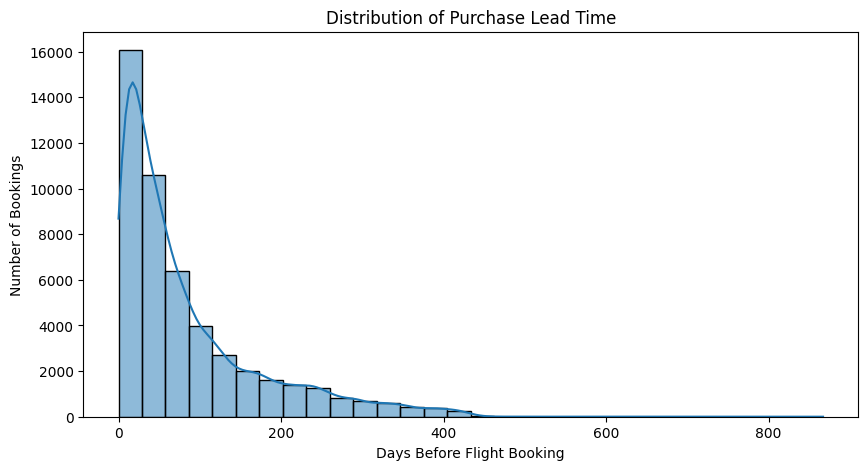

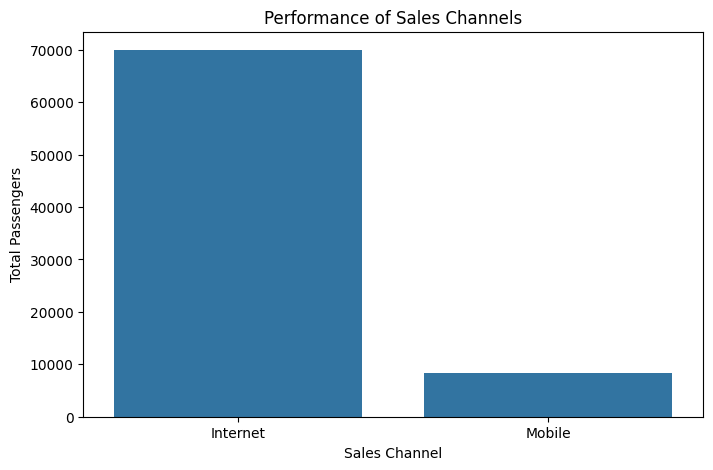

Percentage of Passengers Choosing Extra Services:
 wants_extra_baggage      66.822913
wants_preferred_seat     29.563118
wants_in_flight_meals    42.663501
dtype: float64


In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
# df = pd.read_csv("your_airline_data.csv")

# 1. Inspect Data
print(df.head())  # View first few rows
print(df.info())  # Check data types and missing values
print(df.describe())  # Summary statistics

# 2. Handle Missing Values
print(df.isnull().sum())  # Count missing values per column
df = df.dropna()  # Drop missing values (or use df.fillna(value))

# 3. Check for Duplicates
print(f"Duplicate rows: {df.duplicated().sum()}")
df = df.drop_duplicates()

# 4. Grouping & Aggregation - Total Passengers per Booking Origin
passengers_by_origin = df.groupby("booking_origin")["num_passengers"].sum().reset_index()
passengers_by_origin = passengers_by_origin.sort_values(by="num_passengers", ascending=False)
print(passengers_by_origin)

# 5. Visualization - Top 10 Booking Origins by Passenger Count
plt.figure(figsize=(12, 6))
sns.barplot(x="booking_origin", y="num_passengers", data=passengers_by_origin.head(10))
plt.xticks(rotation=45)
plt.xlabel("Booking Origin")
plt.ylabel("Total Passengers")
plt.title("Top 10 Booking Origins by Passenger Count")
plt.show()

# 6. Flight Route Analysis - Most Popular Routes
popular_routes = df.groupby("route")["num_passengers"].sum().reset_index()
popular_routes = popular_routes.sort_values(by="num_passengers", ascending=False)
print(popular_routes.head(10))

# 7. Booking Completion Rate
booking_completion_rate = df["booking_complete"].value_counts(normalize=True) * 100
print("Booking Completion Rate:\n", booking_completion_rate)

# 8. Purchase Lead Time Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["purchase_lead"], bins=30, kde=True)
plt.xlabel("Days Before Flight Booking")
plt.ylabel("Number of Bookings")
plt.title("Distribution of Purchase Lead Time")
plt.show()

# 9. Sales Channel Performance
sales_channel_perf = df.groupby("sales_channel")["num_passengers"].sum().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x="sales_channel", y="num_passengers", data=sales_channel_perf)
plt.xlabel("Sales Channel")
plt.ylabel("Total Passengers")
plt.title("Performance of Sales Channels")
plt.show()

# 10. Extra Services Preference
extra_services = df[["wants_extra_baggage", "wants_preferred_seat", "wants_in_flight_meals"]].mean() * 100
print("Percentage of Passengers Choosing Extra Services:\n", extra_services)


✅ Accuracy: 0.86
✅ AUC-ROC Score: 0.77

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92      8520
           1       0.57      0.11      0.19      1480

    accuracy                           0.86     10000
   macro avg       0.72      0.55      0.55     10000
weighted avg       0.82      0.86      0.81     10000



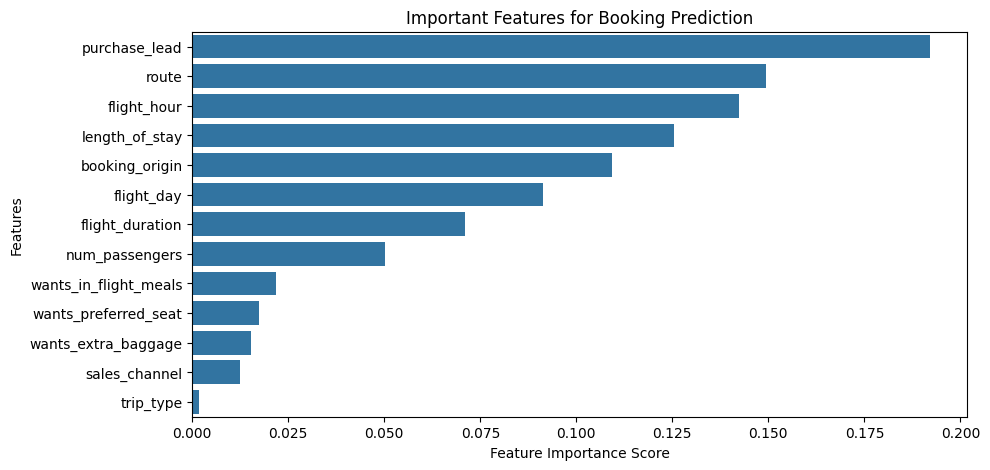

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Load Dataset
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")

# Drop Missing Values
df = df.dropna()

# Identify Categorical Columns
categorical_cols = ["sales_channel", "trip_type", "route", "booking_origin", "flight_day"]

# Encode Categorical Variables
df_encoded = df.copy()
for col in categorical_cols:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])  # Convert to numeric values

# Define Features (X) and Target (y)
X = df_encoded.drop(columns=["booking_complete"])  # Features
y = df_encoded["booking_complete"]  # Target variable (1 = Booking Completed, 0 = Not Completed)

# Split Data into Train & Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probability scores for ROC

# Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
roc_score = roc_auc_score(y_test, y_prob)
print(f"✅ Accuracy: {accuracy:.2f}")
print(f"✅ AUC-ROC Score: {roc_score:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Feature Importance Visualization
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Important Features for Booking Prediction")
plt.show()
